In [7]:
import sys
from IPython.display import Image, display
sys.path.append(os.path.expanduser('~/Documents/sync/progetti/tb2ud/'))
sys.path.append(os.path.expanduser('~/PycharmProjects/Udapi_AGLDT'))

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plan-of-the-talk" data-toc-modified-id="Plan-of-the-talk-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plan of the talk</a></span><ul class="toc-item"><li><span><a href="#Greek-treebanks-in-UD-(v.-2.12)" data-toc-modified-id="Greek-treebanks-in-UD-(v.-2.12)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Greek treebanks in UD (v. 2.12)</a></span></li><li><span><a href="#What-is-the-problem-with-the-AGDT?" data-toc-modified-id="What-is-the-problem-with-the-AGDT?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>What is the problem with the AGDT?</a></span><ul class="toc-item"><li><span><a href="#Limits-with-the-UD-version" data-toc-modified-id="Limits-with-the-UD-version-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Limits with the UD version</a></span></li><li><span><a href="#Limits-with-the-UD-version" data-toc-modified-id="Limits-with-the-UD-version-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Limits with the UD version</a></span></li><li><span><a href="#Limits-with-the-UD-version" data-toc-modified-id="Limits-with-the-UD-version-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Limits with the UD version</a></span></li><li><span><a href="#Conversion/updating-problems" data-toc-modified-id="Conversion/updating-problems-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Conversion/updating problems</a></span></li><li><span><a href="#Limits-with-the-original-annotation" data-toc-modified-id="Limits-with-the-original-annotation-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Limits with the original annotation</a></span></li></ul></li><li><span><a href="#Benefits-of-adopting-(a-consistent)-UD" data-toc-modified-id="Benefits-of-adopting-(a-consistent)-UD-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Benefits of adopting (a consistent) UD</a></span></li></ul></li><li><span><a href="#What-are-we-doing?" data-toc-modified-id="What-are-we-doing?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What are we doing?</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Homerus redivivus

**<sup><sub>Challenges and new perspectives in revitalizing Ancient Greek treebanks in UD</sub></sup>**

by [Francesco Mambrini](https://docenti.unicatt.it/ppd2/en/docenti/34146/francesco-mambrini/profilo), 

Università Cattolica del Sacro Cuore, Milan

In [ ]:
import tarfile
import os

with tarfile.open(os.path.expanduser('~/Downloads/ud-treebanks-v2.12.tgz')) as tar:
    names = tar.getnames()

ags = [n for n in names if 'UD_Ancient_Greek' in n and n.endswith('.conllu')]


In [ ]:
import conllu

def print_stats(flist, tarobj):
    sents = []
    for pth in flist:
        f = tarobj.extractfile(pth).read().decode('utf8')
        sents.extend(conllu.parse(f))
    print(f'*** Corpus: {flist[0].split("/")[1]}')
    print(f'Nr. sentences: {len(sents)}')
    print(f'Nr. tokens: {len([t for s in sents for t in s])}')
    print(f'Nr. empty nodes: {len([t for s in sents for t in s if t["form"].startswith("E")])}\n----\n')

agdt = ['ud-treebanks-v2.12/UD_Ancient_Greek-Perseus/grc_perseus-ud-test.conllu',
 'ud-treebanks-v2.12/UD_Ancient_Greek-Perseus/grc_perseus-ud-train.conllu',
 'ud-treebanks-v2.12/UD_Ancient_Greek-Perseus/grc_perseus-ud-dev.conllu']

proiel = ['ud-treebanks-v2.12/UD_Ancient_Greek-PROIEL/grc_proiel-ud-train.conllu',
 'ud-treebanks-v2.12/UD_Ancient_Greek-PROIEL/grc_proiel-ud-dev.conllu',
 'ud-treebanks-v2.12/UD_Ancient_Greek-PROIEL/grc_proiel-ud-test.conllu']

tar = tarfile.open(os.path.expanduser('~/Downloads/ud-treebanks-v2.12.tgz'))
print_stats(agdt, tar)
print_stats(proiel, tar)

## Plan of the talk

1. Introduction: Ancient Greek in UD (v. 2.12)
2. Why "revitalizing" it?
3. What I am (we are) doing

### Greek treebanks in UD (v. 2.12)

|           | Nr. Sentences  | Nr. Tokens  | Nr. Empty Tokens |
|---       |---:|---:|---:|
| **Perseus**  | 13,919  | 202,989  | 0 |
| **PROIEL**   | 17,082  | 214,005  | 0  |

* Perseus (AGDT):
    - *parts* of works by/from:
        - *Iliad*, *Hom. Hymns*, Hesiod
        - Aeschylus, Sophocles
        - Aesop, Herodotus, Thucydides, Lysias, Polybius, Diodorus Siculus, Plutarch, Athenaeus, Apollodorus

* PROIEL:
    - *New Testament*
    - selections from Herodotus

### What is the problem with the AGDT?

1. limits with the UD version
2. issues with the original annotation

#### Limits with the UD version

1. it's incomplete:
    - texts are not completely converted

```
The *Iliad* in the AGDT has **8,422**; in UD there are **6,003** sentences.
The *Odyssey* in the AGDT has **6,723**; in UD there are *0** sentences!!!
```

#### Limits with the UD version

1. it's incomplete:
    - texts are not completely converted
    - **much more data** annotated using Perseus (i.e. PDT, a-layer) dependency formalism 

![Available treebanks (2019)]( lib/Grc_Treebanks.png)

From [Keersmaekers et al. 2019 (slide 15)](https://syntaxfest.github.io/syntaxfest19/slides/slides_68.pdf)

#### Limits with the UD version

1. it's incomplete
2. it's outdated (UD v. 1, not completely ported to v. 2)
3. it has some conversion problems

#### Conversion/updating problems

Some examples:
- Syntax:
    - multiple `obj`'s (596 in the whole Perseus UD; 379 in the *Il.* only);
    - `iobj` used inconsistently with the most recent [consensus](https://universaldependencies.org/u/dep/iobj.html) of the UD community;
    - predicative adjectives ([optional depictives](https://universaldependencies.org/u/dep/advcl.html#optional-depictives) in the UD guidelines) not aligned with the new rules. 
- POS, morphology and lemmatization:
    - `DET`, `ADJ` and `PRON`;
    - `PART` and `ADV`?
    - treatment of aorist in terms of [tense](https://universaldependencies.org/u/feat/Tense.html) feature;
    - treatment of "medio-passive" ([voice](https://universaldependencies.org/u/feat/Voice.html) feature)


#### Limits with the original annotation

1. lemmatization of suppletive verbs (`εἶπον`, `ἐρῶ`, `λέγω`)
2. *Accusativus cum participio* constructions inconsistently annotated;
3. adnominal dative ("she touched *my* hand") vs "free" or "ethic" verb argument ("she touched the hand *to me*)
4. adverbs as verb arguments (`δεῦρο ἐλθών`, `πῶς ἔχεις` tagged as `obj`)

### Benefits of adopting (a consistent) UD

1. solid anchor to typologically widespread set of resources
2. many, many tools from a wide community (software, models, guidelines, extensions)
3. a large community for discussion
4. a flexible formalism, to capture both "universal" and language specific features:
    - "irregular" constructions (anacolython)
    - particles and discourse
    - secundary edges
    - elliptic constructions (v.2)

## What are we doing?

1. a new conversion routine



```
As the current annotation is incomplete/tailored to v. 1, it makes sense to implement 
a new framework 
```

The new conversion is written in Python and based on [UDapi](https://udapi.github.io/), a framework that has the great advantage of being **modular** (the modules can be supplemented or revised)

```bash
udapy -v .udapi_agldt.read.Agldt files="$1" fix_cycles=True\
  .SetSpaceAfter \
  .CreateUpos \
  .CreateFeats \
  .SetMember \
  .ShallowConverter \
  .udapi_agldt.util.ShiftArtificials \
  .SubTreeConverter with_enhanced="True" \
  .FixObj \
  .RehangPunct \
  .tb2ud.deprecated.SetArtificials \
  .MakeEnhanced \
  .postprocess.FixSomePos \
  .PurgeMisc \
  .text.UpdateText \
  util.Eval doc='doc.meta["docname"]=doc.meta["loaded_from"][:-4]+".conllu"' \
  write.Conllu docname_as_file=1
```

the routine I used (`tb2ud`) is available in [my GitHub](https://github.com/francescomambrini/tb2ud)

(I also have a series of modules to read and interact with the AGDT format in UDapi, called [`Udapy_AGLDT`](https://github.com/francescomambrini/Udapi_AGLDT))

In [8]:
# for example
from udapi.core.document import Document
from tb2ud.createupos import CreateUpos
from udapi_agldt.read.agldt import Agldt as AgldtReader
from udapi.block.write.textmodetrees import TextModeTrees

doc = Document()
reader = AgldtReader(files='lib/treebank.xml')
reader.apply_on_document(doc)

tree = next(doc.trees)
tree.draw()

# sent_id = 1
# text = μοῦσαι Πιερίηθεν ἀοιδῇσιν κλείουσαι δεῦτε , Δί̓ ἐννέπετε , σφέτερον πατέῤ ὑμνείουσαι · [0]
─┮
 │            ╭─┮ μοῦσαι n ExD
 │            │ ┡─╼ Πιερίηθεν d ATR
 │            │ │ ╭─╼ ἀοιδῇσιν n ADV
 │            │ ╰─┶ κλείουσαι v ATR
 │            │                        ╭─╼ δεῦτε d OBJ
 ┡────────────┾ , u COORD              │
 │            │ ╭─╼ Δί̓ n OBJ          │
 │            ┡─┾ ἐννέπετε v PRED_CO   │
 │            │ │ ╭─╼ , u AuxX         │
 │            │ │ │ ╭─╼ σφέτερον a ATR │
 │            │ │ ┢─┶ πατέῤ n OBJ      │
 │            │ ╰─┶ ὑμνείουσαι v ADV   │
 ╰─╼ · u AuxK │                        │
              ╰────────────────────────┶ [0] _ PRED_CO



In [9]:
upos = CreateUpos()
upos.apply_on_document(doc)
tree.draw()

# sent_id = 1
# text = μοῦσαι Πιερίηθεν ἀοιδῇσιν κλείουσαι δεῦτε , Δί̓ ἐννέπετε , σφέτερον πατέῤ ὑμνείουσαι · [0]
─┮
 │                ╭─┮ μοῦσαι NOUN ExD
 │                │ ┡─╼ Πιερίηθεν ADV ATR
 │                │ │ ╭─╼ ἀοιδῇσιν NOUN ADV
 │                │ ╰─┶ κλείουσαι VERB ATR
 │                │                          ╭─╼ δεῦτε ADV OBJ
 ┡────────────────┾ , PUNCT COORD            │
 │                │ ╭─╼ Δί̓ PROPN OBJ        │
 │                ┡─┾ ἐννέπετε VERB PRED_CO  │
 │                │ │ ╭─╼ , PUNCT AuxX       │
 │                │ │ │ ╭─╼ σφέτερον DET ATR │
 │                │ │ ┢─┶ πατέῤ NOUN OBJ     │
 │                │ ╰─┶ ὑμνείουσαι VERB ADV  │
 ╰─╼ · PUNCT AuxK │                          │
                  ╰──────────────────────────┶ [0] _ PRED_CO



2. a lot of... **manual revision**!

- dative:
    - adnominal or verbal?
    - τοι (in Homer): dat. of pronoun or particle?
- `obj`'s
    - double-accusative constructions (with C. Zanchi and E. Biagetti: *coming soon*...)
    - adverbs as verb arguments
- ellipsis

>μή τίς **τοι** φεύγοντι μεταφρένῳ ἐν δόρυ πήξῃ· (*Il*. 8.95)

>Do not let them strike the spear **in your back** as you run for it (tr. Lattimore)

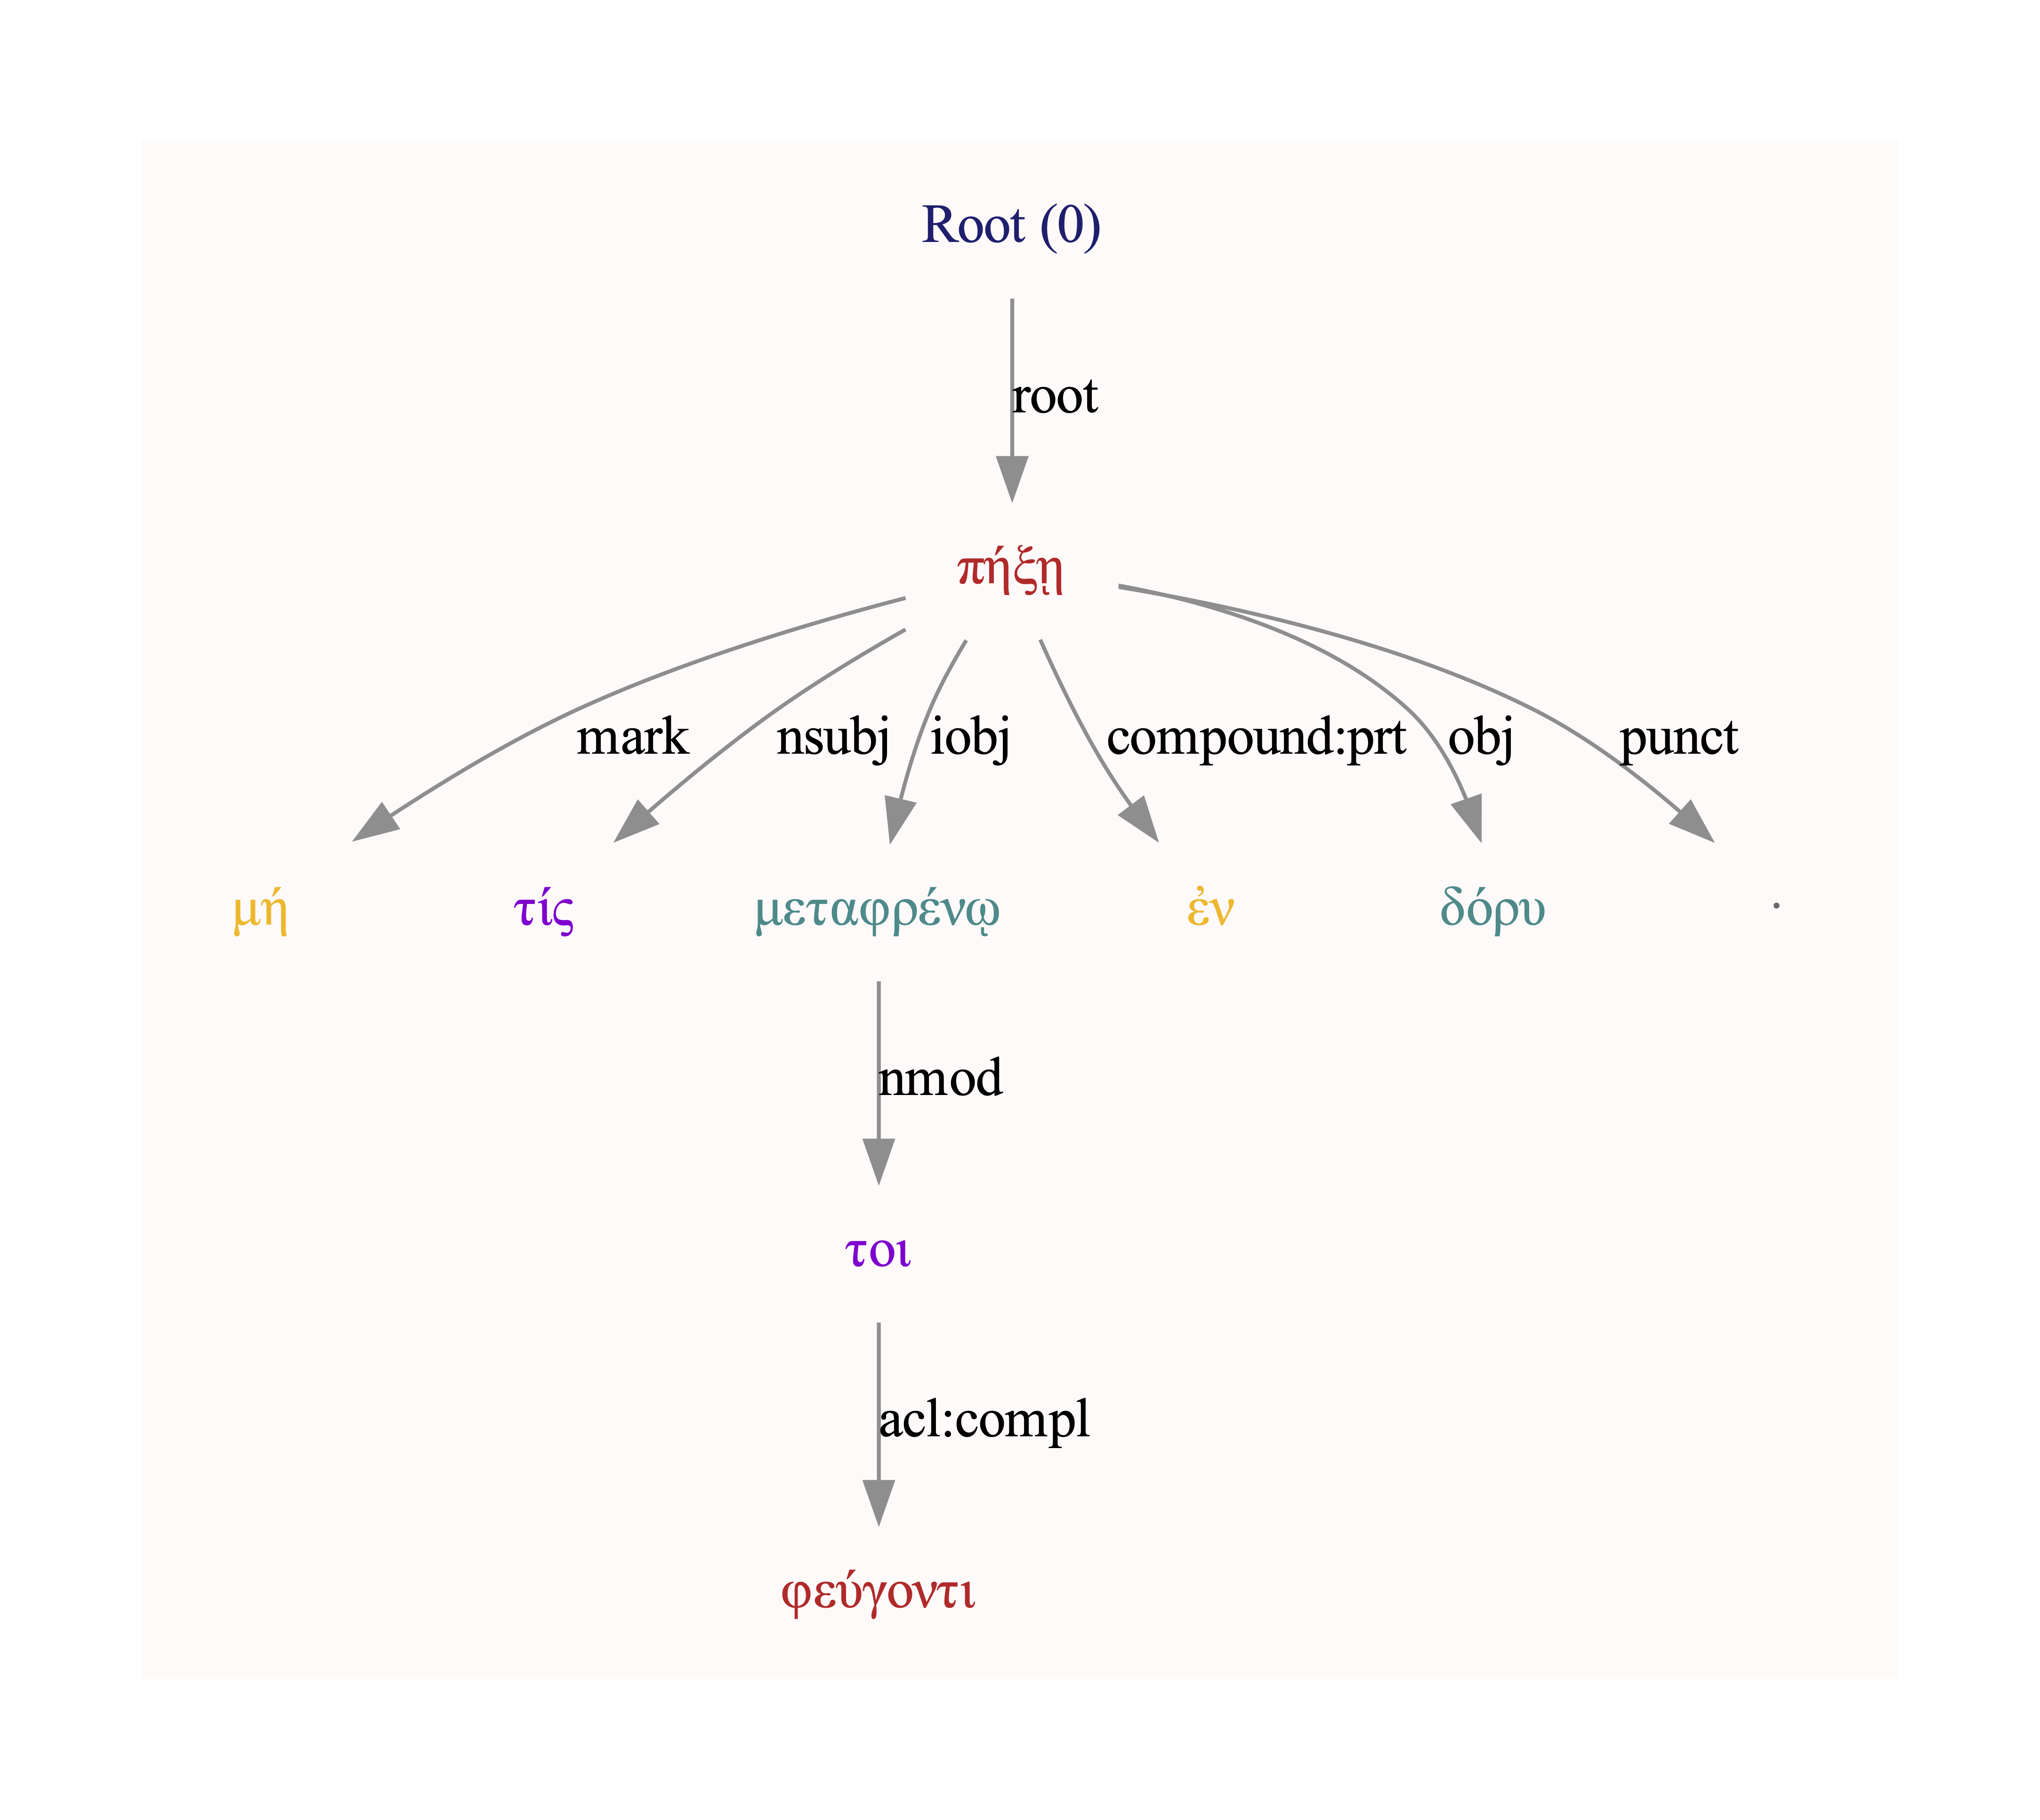

In [10]:
display(Image('lib/sent.png'))

## Conclusions

1. Ancient Greek could (potentially) be one the most represented languages in UD!
2. There is a lot to do with the Perseus-compliant treebanks to harmonize the annotation and bring it to speed with UD2
3. Some of it, require extensive manual revision
4. The work I have been doing is in a collection named [Daphne](https://github.com/francescomambrini/Daphne/)

---

In [ ]:
from glob import glob

sents = []
for pth in glob('../data/annotation/latest/tlg0012/tlg002/*.conllu'):
    with open(pth) as f:
        sents.extend(conllu.parse(f.read()))

len(sents)

In [ ]:
sents = []
for pth in agdt:
    f = tar.extractfile(pth).read().decode('utf8')
    sents.extend(conllu.parse(f))

ils = [s for s in sents if s.metadata['sent_id'].startswith('tlg0012.tlg001')]
len(ils)



In [ ]:
works = [s.metadata['sent_id'][:14] for s in sents]

In [ ]:
from collections import Counter
c = Counter(works)
c.most_common()